<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap05a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題5.1

最小二乗法の解析的手法をPythonでコーディングせよ．

使用する関数

[numpy.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) 逆行列を求める

データの準備と表示

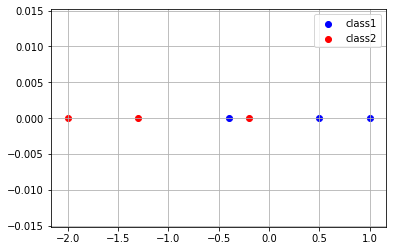

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, 0, 1, 0, 0])
plt.grid()
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='blue', label='class1')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='red',  label='class2')
plt.legend(loc='upper right')

学習の設定

In [2]:
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, d)), X), axis=1)
print(X2)

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -0.4]
 [ 1.  -1.3]
 [ 1.  -2. ]]


学習

In [3]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T), y)
print(f'result: {w}')

result: [0.64886731 0.37216828]


[numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) 最小二乗法を実行する関数を用いた別解

In [4]:
w2 = np.linalg.lstsq(X2, y)[0]
print(f'result: {w2}')

result: [0.64886731 0.37216828]


## 例題5.3

Widrow-Hoffの学習規則を Python でコーディングせよ．

使用する関数

[numpy.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) 行列を結合

[numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) 要素の和

[numpy.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) 絶対値

データの準備と表示

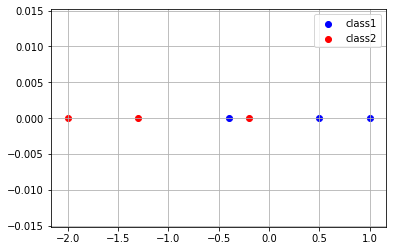

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, 0, 1, 0, 0])
plt.grid()
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='blue', label='class1')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='red',  label='class2')
plt.legend(loc='upper right')

学習の設定

In [6]:
eps = 1e-8
differ = np.inf
olderr = np.inf
w = np.array([0.2, 0.3])
rho = 0.2
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, d)), X), axis=1)
print(X2)

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -0.4]
 [ 1.  -1.3]
 [ 1.  -2. ]]


Widrow-Hoffの学習規則

In [7]:
while differ > eps:
    g = np.dot(X2, w) - y
    w = w - rho * np.sum(np.vstack([g,g]).T * X2, axis=0)
    sqrerr = 0.5 * np.sum(g**2)
    differ = np.abs(olderr - sqrerr)
    olderr = sqrerr
    print(f'w = {w}')

w = [0.704  0.1876]
w = [0.549248  0.4776272]
w = [0.71941146 0.2792146 ]
w = [0.59014072 0.44581365]
w = [0.69596241 0.3124593 ]
w = [0.61078798 0.42032938]
w = [0.6796005  0.33327726]
w = [0.62405298 0.40356557]
w = [0.66890088 0.34681937]
w = [0.63269312 0.39263373]
w = [0.66192557 0.35564546]
w = [0.63832471 0.38550802]
w = [0.65737891 0.36139843]
w = [0.64199546 0.38086335]
w = [0.65441531 0.36514831]
w = [0.64438813 0.37783587]
w = [0.65248359 0.36759255]
w = [0.6459477  0.37586252]
w = [0.65122447 0.36918574]
w = [0.64696426 0.37457625]
w = [0.65040375 0.37022421]
w = [0.64762687 0.37373784]
w = [0.64986879 0.37090111]
w = [0.64805877 0.37319134]
w = [0.64952009 0.37134232]
w = [0.64834029 0.37283513]
w = [0.6492928 0.3716299]
w = [0.64852379 0.37260295]
w = [0.64914466 0.37181736]
w = [0.6486434  0.37245161]
w = [0.64904809 0.37193955]
w = [0.64872136 0.37235296]
w = [0.64898515 0.37201919]
w = [0.64877218 0.37228866]
w = [0.64894412 0.3720711 ]
w = [0.6488053  0.37224675]
w = 

### 機械学習ライブラリ scikit-learn を利用した最急降下法のコード

使用するクラス、メソッド

[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

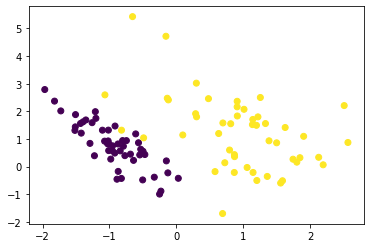

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [9]:
clf = SGDClassifier(loss='squared_loss', eta0=0.01, learning_rate="constant", penalty=None)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='squared_loss',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

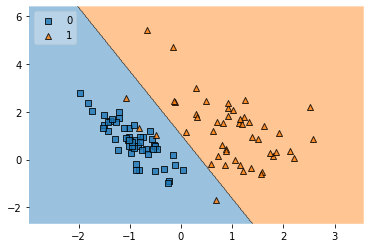

In [10]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)